# Capstone Project

## Dataset and Data Collection

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
sns.set_style('darkgrid')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
# Reading in traininf data from amazon s3 where I have it stored
data_csv = 'https://s3.us-east-2.amazonaws.com/aatestingbucket/train.csv'

In [3]:
# Reading in test data from amazon s3 where I have it stored
test_csv = 'https://s3.us-east-2.amazonaws.com/aatestingbucket/test_2.csv'

In [4]:
# converting test data into data frame
test = pd.read_csv(test_csv)

In [5]:
test.head()

,Id,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Feature_13,Feature_14,Feature_15,Feature_16,Feature_17,Feature_18,Feature_19,Feature_20,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Ret_MinusTwo,Ret_MinusOne,Ret_2,Ret_3,Ret_4,Ret_5,Ret_6,Ret_7,Ret_8,Ret_9,Ret_10,Ret_11,Ret_12,Ret_13,Ret_14,Ret_15,Ret_16,Ret_17,Ret_18,Ret_19,Ret_20,Ret_21,Ret_22,Ret_23,Ret_24,Ret_25,Ret_26,Ret_27,Ret_28,Ret_29,Ret_30,Ret_31,Ret_32,Ret_33,Ret_34,Ret_35,Ret_36,Ret_37,Ret_38,Ret_39,Ret_40,Ret_41,Ret_42,Ret_43,Ret_44,Ret_45,Ret_46,Ret_47,Ret_48,Ret_49,Ret_50,Ret_51,Ret_52,Ret_53,Ret_54,Ret_55,Ret_56,Ret_57,Ret_58,Ret_59,Ret_60,Ret_61,Ret_62,Ret_63,Ret_64,Ret_65,Ret_66,Ret_67,Ret_68,Ret_69,Ret_70,Ret_71,Ret_72,Ret_73,Ret_74,Ret_75,Ret_76,Ret_77,Ret_78,Ret_79,Ret_80,Ret_81,Ret_82,Ret_83,Ret_84,Ret_85,Ret_86,Ret_87,Ret_88,Ret_89,Ret_90,Ret_91,Ret_92,Ret_93,Ret_94,Ret_95,Ret_96,Ret_97,Ret_98,Ret_99,Ret_100,Ret_101,Ret_102,Ret_103,Ret_104,Ret_105,Ret_106,Ret_107,Ret_108,Ret_109,Ret_110,Ret_111,Ret_112,Ret_113,Ret_114,Ret_115,Ret_116,Ret_117,Ret_118,Ret_119,Ret_120
0,1,1.0,1.412783,-0.056284,NaN,10.0,0.413226,18871,0.2138,11.0,NaN,-0.229910,0.97,8.0,1.683134,12.513327,1.0,-0.145889,0.162457,-0.650406,7.0,NaN,-0.709206,-4.106617,-0.556802,-0.401189,-0.017882,0.031248,0.000190,-0.000193,-0.000380,-0.000728,0.000003,-0.000369,0.000017,-0.000378,-0.000208,-0.000925,0.000566,NaN,NaN,-0.000185,0.000177,3.667361e-04,NaN,NaN,-0.000003,-0.000010,NaN,NaN,0.000181,-0.000199,1.868220e-04,-0.000374,-0.000177,NaN,0.000165,0.001477,NaN,-0.000195,NaN,-0.001106,-0.000740,3.624841e-04,-0.001491,-0.000007,0.001857,-0.001852,0.000002,-0.000005,-9.388527e-04,0.000013,-0.001853,-0.000372,-0.000396,-0.000165,0.000007,2.023628e-03,-0.000187,-0.001670,-0.000014,0.000007,0.000005,-0.000016,NaN,0.000387,-0.000185,NaN,0.000005,1.489834e-03,-0.000755,0.000183,NaN,7.948409e-07,0.000193,0.000924,NaN,-0.000191,0.002236,-0.001108,0.000005,0.000017,-0.000004,-0.000010,NaN,-0.000372,-0.000555,0.000201,0.000929,-0.000016,NaN,1.098055e-03,-0.000188,-0.000011,0.001477,0.000931,0.000370,-0.000006,0.000191,0.000386,-0.000167,-0.000193,-0.000173,NaN,0.000194,0.000382,0.000006,0.002411,NaN,0.000552,NaN,0.001313,0.000758,0.000376,-0.000193,NaN,NaN,0.000370,-0.000762,NaN,0.000366,-0.002444,-0.001301,-0.000917,0.000762,-0.000556,0.000759
1,2,NaN,NaN,0.907973,1.002425,7.0,-0.257825,5852,0.2138,13.0,4.0,-0.971909,0.93,4.0,1.395301,13.225147,1.0,-0.569275,0.378955,-1.192782,9.0,-0.085532,-1.812607,0.997244,-1.533825,-0.689509,0.013274,0.013914,0.000912,0.000893,-0.000458,0.000000,-0.001848,0.000468,0.000930,-0.000433,0.001382,0.000011,-0.000447,-0.000898,0.000006,-0.000475,0.000467,-8.185202e-07,0.000451,-0.000914,-0.000469,-0.000459,-0.000002,-0.000439,0.000439,0.000459,-8.727907e-07,-0.000450,0.000459,-0.000016,0.000002,-0.000006,-2.370172e-06,-0.000003,-0.000448,0.000451,-0.000458,4.532304e-04,-0.000453,0.000456,-0.000013,0.000005,0.000002,0.000453,-1.894849e-07,-0.000003,0.000455,0.000011,0.000010,0.000478,-0.000907,9.194885e-04,0.000005,0.000008,0.000003,-0.000915,0.000470,0.000020,0.000459,-0.000449,0.000927,-0.000914,0.000009,-4.616205e-04,-0.000001,-0.000458,0.000452,5.095474e-06,-0.000012,0.000000,0.000000,-0.000018,-0.000008,-0.000008,0.000915,-0.000901,-0.000007,-0.000460,0.000474,-0.000458,-0.000939,-0.000001,0.000439,-0.000004,-0.000909,-4.469108e-04,-0.000003,-0.000473,-0.000469,-0.000450,0.000469,-0.000933,-0.000914,-0.000464,0.000451,-0.001367,0.000457,9.067531e-04,0.000458,-0.001001,0.000100,0.000901,0.000001,0.000011,-0.000014,-0.000459,0.000890,-0.000453,0.000461,0.000437,-0.000016,0.000457,0.000003,-0.000007,-0.000003,-0.000012,-0.000463,-0.000003,-0.000002,0.000468,-0.000012
2,3,NaN,-0.607583,1.076668,0.517865,5.0,0.947340,76935,0.0105,10.0,NaN,-1.096276,0.88,4.0,1.722474,0.227258,1.0,-0.530189,0.349146,-0.876513,5.0,0.956571,NaN,1.240156,-1.886371,-0.293317,-0.046656,-0.021941,0.001570,-0.0006

In [6]:
test.shape

(120000, 147)

In [7]:
# reading in training data and converting into dataframe
df = pd.read_csv(data_csv)
df.head()

,Id,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Feature_13,Feature_14,Feature_15,Feature_16,Feature_17,Feature_18,Feature_19,Feature_20,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Ret_MinusTwo,Ret_MinusOne,Ret_2,Ret_3,Ret_4,Ret_5,Ret_6,Ret_7,Ret_8,Ret_9,Ret_10,Ret_11,Ret_12,Ret_13,Ret_14,Ret_15,Ret_16,Ret_17,Ret_18,Ret_19,Ret_20,Ret_21,Ret_22,Ret_23,Ret_24,Ret_25,Ret_26,Ret_27,Ret_28,Ret_29,Ret_30,Ret_31,Ret_32,Ret_33,Ret_34,Ret_35,Ret_36,Ret_37,Ret_38,Ret_39,Ret_40,Ret_41,Ret_42,Ret_43,Ret_44,Ret_45,Ret_46,Ret_47,Ret_48,Ret_49,Ret_50,Ret_51,Ret_52,Ret_53,Ret_54,Ret_55,Ret_56,Ret_57,Ret_58,Ret_59,Ret_60,Ret_61,Ret_62,Ret_63,Ret_64,Ret_65,Ret_66,Ret_67,Ret_68,Ret_69,Ret_70,Ret_71,Ret_72,Ret_73,Ret_74,Ret_75,Ret_76,Ret_77,Ret_78,Ret_79,Ret_80,Ret_81,Ret_82,Ret_83,Ret_84,Ret_85,Ret_86,Ret_87,Ret_88,Ret_89,Ret_90,Ret_91,Ret_92,Ret_93,Ret_94,Ret_95,Ret_96,Ret_97,Ret_98,Ret_99,Ret_100,Ret_101,Ret_102,Ret_103,Ret_104,Ret_105,Ret_106,Ret_107,Ret_108,Ret_109,Ret_110,Ret_111,Ret_112,Ret_113,Ret_114,Ret_115,Ret_116,Ret_117,Ret_118,Ret_119,Ret_120,Ret_121,Ret_122,Ret_123,Ret_124,Ret_125,Ret_126,Ret_127,Ret_128,Ret_129,Ret_130,Ret_131,Ret_132,Ret_133,Ret_134,Ret_135,Ret_136,Ret_137,Ret_138,Ret_139,Ret_140,Ret_141,Ret_142,Ret_143,Ret_144,Ret_145,Ret_146,Ret_147,Ret_148,Ret_149,Ret_150,Ret_151,Ret_152,Ret_153,Ret_154,Ret_155,Ret_156,Ret_157,Ret_158,Ret_159,Ret_160,Ret_161,Ret_162,Ret_163,Ret_164,Ret_165,Ret_166,Ret_167,Ret_168,Ret_169,Ret_170,Ret_171,Ret_172,Ret_173,Ret_174,Ret_175,Ret_176,Ret_177,Ret_178,Ret_179,Ret_180,Ret_PlusOne,Ret_PlusTwo,Weight_Intraday,Weight_Daily
0,1,NaN,NaN,NaN,NaN,8.0,NaN,75751,0.2254,11.0,NaN,NaN,0.49,5.0,1.842984,27.053679,1.0,NaN,NaN,-0.925463,2.0,NaN,-0.489492,NaN,NaN,NaN,0.055275,-0.010770,0.000003,-0.000734,-0.000738,-0.000007,0.000423,0.000438,-0.000076,0.000645,-0.000006,0.000006,NaN,-0.000156,NaN,NaN,-0.000430,-1.964625e-05,0.000002,-0.000031,NaN,NaN,-7.539950e-06,NaN,0.000416,-0.000164,-0.000009,-0.000438,NaN,0.000010,-7.176461e-04,-0.000162,NaN,NaN,NaN,-0.000582,0.001003,-0.000010,0.000134,0.000014,-0.000142,-0.001003,-0.000007,-0.000005,-1.277039e-05,NaN,0.000706,-0.000734,-7.311366e-04,-0.001996,-0.000153,0.000133,NaN,NaN,-0.000007,0.000713,0.000009,NaN,-0.000432,-0.001152,-0.000723,9.982299e-07,-0.003579,0.000435,-0.000012,-0.000132,0.000004,0.000418,-0.000011,NaN,-0.002724,-0.002996,0.000129,0.000012,-0.000002,-1.369941e-04,-0.003537,-0.000142,0.000135,0.000020,-1.318606e-04,0.000449,-0.000008,0.000006,0.000282,-1.390130e-04,-1.284489e-04,0.000005,-0.000005,-1.693501e-03,-0.002141,0.000003,-0.000274,-0.000015,0.001279,0.000282,-0.000003,-0.000156,0.000024,-0.000560,-0.000580,0.000138,-0.002277,0.000125,0.000406,-0.000427,-0.000013,-0.000843,1.666111e-04,0.000569,0.000695,NaN,0.000700,-0.000843,0.000268,-0.000415,-0.001133,0.000004,-0.000137,-0.000009,1.340780e-04,-0.000137,-0.000565,-0.000704,-0.005605,0.000826,0.001966,0.002676,0.000422,-0.000428,-0.000539,-0.002113,-0.001400,-0.000017,-0.002801,-0.000003,0.002099,0.000698,0.000547,-0.001976,0.000012,0.001112,0.000284,0.000003,-0.001976,-0.000842,-0.001390,0.000148,2.846942e-04,0.001254,-0.000130,0.000126,0.000978,0.000151,0.002642,-0.000017,0.000140,0.000015,-0.000011,0.001683,-0.000286,0.000010,0.000152,0.000579,-1.501973e-04,0.000822,0.001392,0.000292,0.000002,0.001133,-0.000134,0.001539,-0.000142,0.000861,0.000544,-0.002688,0.002246,-0.000838,-6.953224e-04,0.000003,-0.001974,-0.019512,0.028846,1.251508e+06,1.564385e+06
1,2,NaN,NaN,NaN,NaN,3.0,0.388896,17369,0.0166,13.0,NaN,-0.409923,0.71,9.0,1.577586,9.546915,1.0,-0.949891,0.917958,-0.897067,9.0,0.886205,-0.151805,1.239856,0.953424,-0.709462,0.009748,0.002987,-0.000487,0.000475,0.000002,-0.000002,-0.000523,-0.000255,-0.000008,0.000048,-0.000312,-0.000742,-0.000009,-0.000248,0.000487,0.000256,-0.000508,2.495416e-04,0.000015,0.000008,-0.000251,-0.000519,-5.029784e-04,0.000240,0.000248,0.000495,-0.000243,-0.

In [8]:
df.shape

(40000, 211)

In [9]:
# dropping unnecessary column
df.drop('Id', axis = 1, inplace=True)

In [10]:
# searching for null values
df.isnull().sum()

Feature_1          33313
Feature_2           9146
Feature_3           1237
Feature_4           7721
Feature_5              0
Feature_6           1933
Feature_7              0
Feature_8            469
Feature_9           1875
Feature_10         19471
Feature_11           987
Feature_12          1096
Feature_13           594
Feature_14           728
Feature_15          2141
Feature_16           610
Feature_17           646
Feature_18           568
Feature_19          1190
Feature_20          7826
Feature_21          1018
Feature_22          1345
Feature_23          1711
Feature_24           726
Feature_25           655
Ret_MinusTwo           0
Ret_MinusOne           0
Ret_2               1054
Ret_3               1245
Ret_4               1202
Ret_5               1275
Ret_6               1320
Ret_7               1228
Ret_8               1210
Ret_9               1317
Ret_10              1313
Ret_11              1369
Ret_12              1238
Ret_13              1327
Ret_14              1367


Data is clean.  All target values are present.  Some Features have missing values.  The goal for the project is to toy with different imputation methods and decide which is better by comparing their performances on different models on targets 61 and 62.

Secondary goal is to use a time series model to predict the first 60 targets.

## EDA & Preliminary Analysis

In [11]:
# subsetting columns with null values
nan_cols = df.columns[df.isnull().any()].values

In [14]:
print nan_cols

['Feature_1' 'Feature_2' 'Feature_3' 'Feature_4' 'Feature_6' 'Feature_8'
 'Feature_9' 'Feature_10' 'Feature_11' 'Feature_12' 'Feature_13'
 'Feature_14' 'Feature_15' 'Feature_16' 'Feature_17' 'Feature_18'
 'Feature_19' 'Feature_20' 'Feature_21' 'Feature_22' 'Feature_23'
 'Feature_24' 'Feature_25' 'Ret_2' 'Ret_3' 'Ret_4' 'Ret_5' 'Ret_6' 'Ret_7'
 'Ret_8' 'Ret_9' 'Ret_10' 'Ret_11' 'Ret_12' 'Ret_13' 'Ret_14' 'Ret_15'
 'Ret_16' 'Ret_17' 'Ret_18' 'Ret_19' 'Ret_20' 'Ret_21' 'Ret_22' 'Ret_23'
 'Ret_24' 'Ret_25' 'Ret_26' 'Ret_27' 'Ret_28' 'Ret_29' 'Ret_30' 'Ret_31'
 'Ret_32' 'Ret_33' 'Ret_34' 'Ret_35' 'Ret_36' 'Ret_37' 'Ret_38' 'Ret_39'
 'Ret_40' 'Ret_41' 'Ret_42' 'Ret_43' 'Ret_44' 'Ret_45' 'Ret_46' 'Ret_47'
 'Ret_48' 'Ret_49' 'Ret_50' 'Ret_51' 'Ret_52' 'Ret_53' 'Ret_54' 'Ret_55'
 'Ret_56' 'Ret_57' 'Ret_58' 'Ret_59' 'Ret_60' 'Ret_61' 'Ret_62' 'Ret_63'
 'Ret_64' 'Ret_65' 'Ret_66' 'Ret_67' 'Ret_68' 'Ret_69' 'Ret_70' 'Ret_71'
 'Ret_72' 'Ret_73' 'Ret_74' 'Ret_75' 'Ret_76' 'Ret_77' 'Ret_78' 'Ret_79'


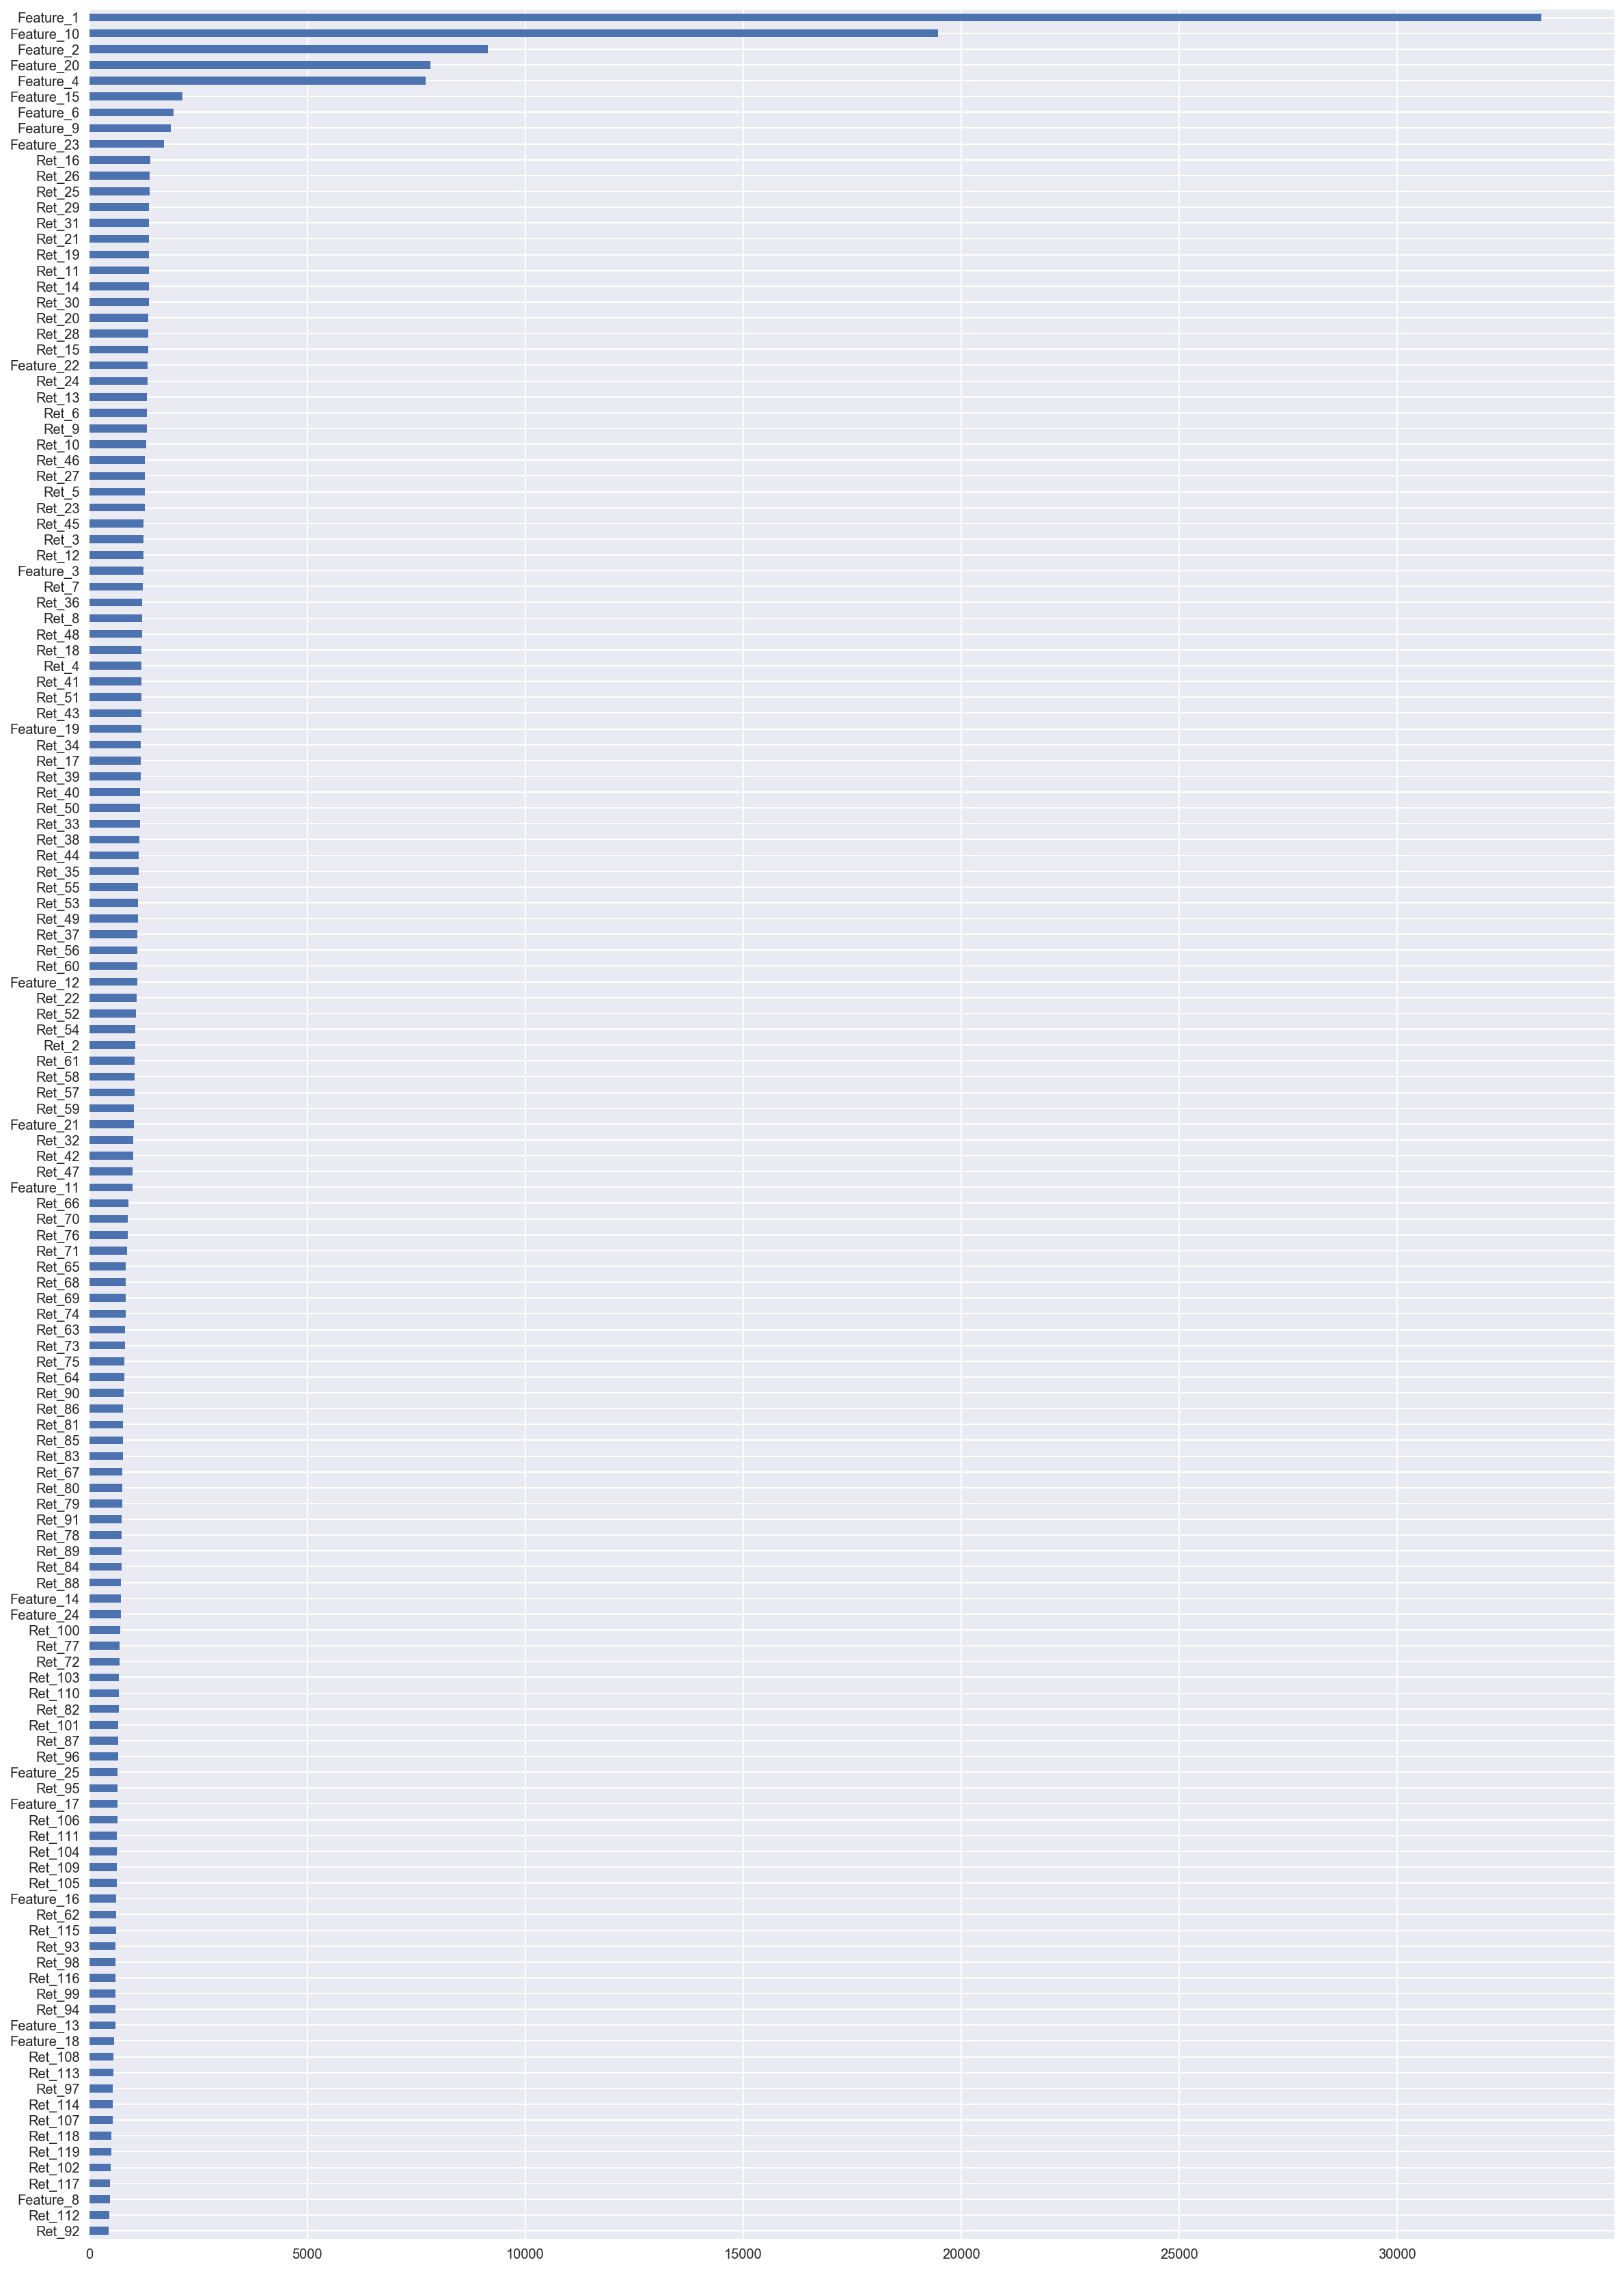

In [14]:
# Bar plot showing sum null values in column descending order

null = df.isnull().sum()
null = null[null > 0]
null.sort_values(inplace=True)
fig, ax = plt.subplots(figsize=(20,30))
null.plot.barh();

In [13]:
# Examining distribution data and searching for annomalies
df.describe().T.sort_values('std')

,count,mean,std,min,25%,50%,75%,max
Ret_25,38616.0,-2.085704e-05,0.000909,-2.139438e-02,-3.238122e-04,-7.049607e-07,2.894418e-04,2.863520e-02
Ret_45,38755.0,-2.739835e-05,0.000913,-1.917603e-02,-3.257995e-04,-3.735825e-07,2.957750e-04,1.341107e-02
Ret_13,38673.0,9.865051e-06,0.000917,-2.108145e-02,-3.157235e-04,0.000000e+00,3.111059e-04,2.057637e-02
Ret_8,38790.0,2.752578e-05,0.000922,-1.975299e-02,-3.043271e-04,2.377959e-07,3.352720e-04,1.854491e-02
Ret_19,38631.0,3.821338e-06,0.000923,-3.080737e-02,-3.123662e-04,0.000000e+00,3.116166e-04,2.365920e-02
Ret_20,38645.0,-2.198678e-05,0.000923,-1.695229e-02,-3.329043e-04,-1.246747e-06,2.950543e-04,3.031239e-02
Ret_6,38680.0,-1.898422e-05,0.000924,-2.473502e-02,-3.333203e-04,0.000000e+00,3.115921e-04,4.009965e-02
Ret_16,38598.0,-1.894765e-05,0.000927,-1.368057e-02,-3.266926e-04,-4.143895e-07,3.049744e-04,1.451375e-02
Ret_55,38875.0,-7.747514e-08,0.000933,-1.381043e-02,-3.176211e-04,0.000000e+00,3.155157e-04,3.468797e-02
Ret_50,38829.0,-9.358152e-06,0.000934,-2.429326e-02,-3.259552e-04,-5.688856e-08,3.091345e-04,1.848374e-02


In [15]:
# Correlation relationship
corr_df = df.corr()**2

In [16]:
# Visualizing it and sorting by weight_daily
corr_df.sort_values('Ret_PlusOne')

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Feature_13,Feature_14,Feature_15,Feature_16,Feature_17,Feature_18,Feature_19,Feature_20,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Ret_MinusTwo,Ret_MinusOne,Ret_2,Ret_3,Ret_4,Ret_5,Ret_6,Ret_7,Ret_8,Ret_9,Ret_10,Ret_11,Ret_12,Ret_13,Ret_14,Ret_15,Ret_16,Ret_17,Ret_18,Ret_19,Ret_20,Ret_21,Ret_22,Ret_23,Ret_24,Ret_25,Ret_26,Ret_27,Ret_28,Ret_29,Ret_30,Ret_31,Ret_32,Ret_33,Ret_34,Ret_35,Ret_36,Ret_37,Ret_38,Ret_39,Ret_40,Ret_41,Ret_42,Ret_43,Ret_44,Ret_45,Ret_46,Ret_47,Ret_48,Ret_49,Ret_50,Ret_51,Ret_52,Ret_53,Ret_54,Ret_55,Ret_56,Ret_57,Ret_58,Ret_59,Ret_60,Ret_61,Ret_62,Ret_63,Ret_64,Ret_65,Ret_66,Ret_67,Ret_68,Ret_69,Ret_70,Ret_71,Ret_72,Ret_73,Ret_74,Ret_75,Ret_76,Ret_77,Ret_78,Ret_79,Ret_80,Ret_81,Ret_82,Ret_83,Ret_84,Ret_85,Ret_86,Ret_87,Ret_88,Ret_89,Ret_90,Ret_91,Ret_92,Ret_93,Ret_94,Ret_95,Ret_96,Ret_97,Ret_98,Ret_99,Ret_100,Ret_101,Ret_102,Ret_103,Ret_104,Ret_105,Ret_106,Ret_107,Ret_108,Ret_109,Ret_110,Ret_111,Ret_112,Ret_113,Ret_114,Ret_115,Ret_116,Ret_117,Ret_118,Ret_119,Ret_120,Ret_121,Ret_122,Ret_123,Ret_124,Ret_125,Ret_126,Ret_127,Ret_128,Ret_129,Ret_130,Ret_131,Ret_132,Ret_133,Ret_134,Ret_135,Ret_136,Ret_137,Ret_138,Ret_139,Ret_140,Ret_141,Ret_142,Ret_143,Ret_144,Ret_145,Ret_146,Ret_147,Ret_148,Ret_149,Ret_150,Ret_151,Ret_152,Ret_153,Ret_154,Ret_155,Ret_156,Ret_157,Ret_158,Ret_159,Ret_160,Ret_161,Ret_162,Ret_163,Ret_164,Ret_165,Ret_166,Ret_167,Ret_168,Ret_169,Ret_170,Ret_171,Ret_172,Ret_173,Ret_174,Ret_175,Ret_176,Ret_177,Ret_178,Ret_179,Ret_180,Ret_PlusOne,Ret_PlusTwo,Weight_Intraday,Weight_Daily
Feature_17,1.921383e-02,6.046339e-03,2.297097e-01,1.544727e-01,1.391582e-02,1.117904e-01,3.809943e-06,8.584089e-07,8.497860e-02,2.803206e-03,1.608249e-01,1.019074e-07,1.861976e-03,1.234554e-02,1.012209e-06,1.839912e-04,1.000000e+00,6.780904e-01,2.671439e-01,4.460058e-03,2.916669e-01,1.162255e-01,6.786350e-02,1.859656e-01,6.738471e-02,1.018630e-04,9.198027e-09,3.433321e-06,2.337718e-04,9.440990e-06,8.901997e-05,2.849952e-05,4.459946e-05,3.051421e-07,8.170499e-06,6.584933e-05,5.336028e-05,1.128611e-04,3.052715e-05,2.726869e-05,8.695720e-05,3.949968e-07,8.229990e-06,3.598752e-06,1.891072e-05,2.961057e-05,1.900232e-05,5.603258e-07,1.073879e-05,1.293918e-05,6.902140e-05,3.739815e-06,9.602383e-06,1.889263e-05,4.839208e-06,6.566025e-06,1.157945e-06,4.685342e-07,3.430686e-06,9.266270e-06,2.462053e-06,3.089917e-05,1.788747e-06,2.749373e-06,1.898339e-06,4.454040e-08,6.910923e-06,1.597920e-05,2.428443e-05,4.881114e-05,8.843380e-05,1.088729e-05,1.658481e-06,6.295505e-06,5.774365e-07,1.353152e-05,2.901634e-05,5.647495e-06,7.053267e-07,1.075841e-06,9.849041e-05,1.227799e-05,1.530612e-05,9.655791e-06,7.510602e-07,2.323834e-05,8.744418e-07,9.032604e-06,9.178070e-06,1.049230e-04,4.429267e-05,2.766054e-05,2.167828e-05,5.051085e-05,6.227864e-05,7.332546e-05,2.348806e-06,5.458093e-05,1.468453e-05,3.791061e-05,3.885952e-05,2.179173e-05,6.383664e-05,6.789140e-05,3.772521e-05,2.144345e-06,1.401246e-05,3.826207e-05,8.186923e-06,4.379617e-05,5.918178e-05,1.991598e-04,4.351100e-07,8.901738e-05,5.058928e-07,2.720907e-05,3.635753e-05,2.575544e-06,5.777871e-07,3.726658e-05,8.491787e-05,4.885528e-08,9.033797e-05,1.022107e-06,6.496021e-06,3.907372e-06,1.088904e-04,1.207259e-06,2.496844e-05,1.367960e-05,2.752976e-06,2.035193e-08,2.143062e-05,2.662411e-06,1.502742e-05,2.549583e-04,1.172075e-05,3.345655e-05,1.097190e-04,1.540648e-06,5.192813e-05,2.236755e-04,9.567325e-06,2.595630e-05,6.042558e-05,2.837437e-05,4.112798e-05,1.457607e-04,2.628757e-05,3.270182e-06,4.086371e-06,2.284321e-05,1.975870e-06,7.548017e-05,2.445855e-04,1.975698e-05,7.326300e-05,9.136169e-06,5.796540e-05,2.843061e-06,1.159382e-04,4.447708e-08,1.338903e-05,1.117502e-04,1.985224e-06,1.533545e-04,3.203127e-05,9.814141e-05,6.378109e-06,1.315878e-06,7.400252e-07,7.471015e-07,1.097214e-05,1.678193e-05,3.998929e-05,3.533142e-06,5.626031e-05,9.094301e-05,8.2

### Plots Showing Data Distribution of Interesting Columns

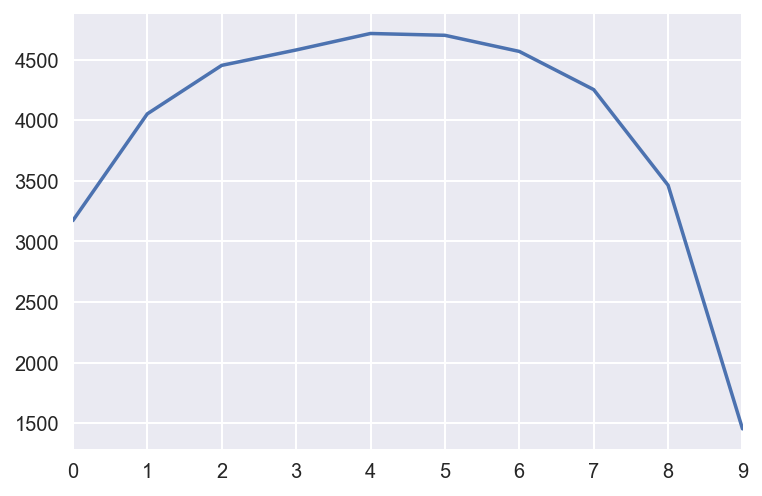

In [18]:
df.Feature_13.value_counts().sort_index().plot()

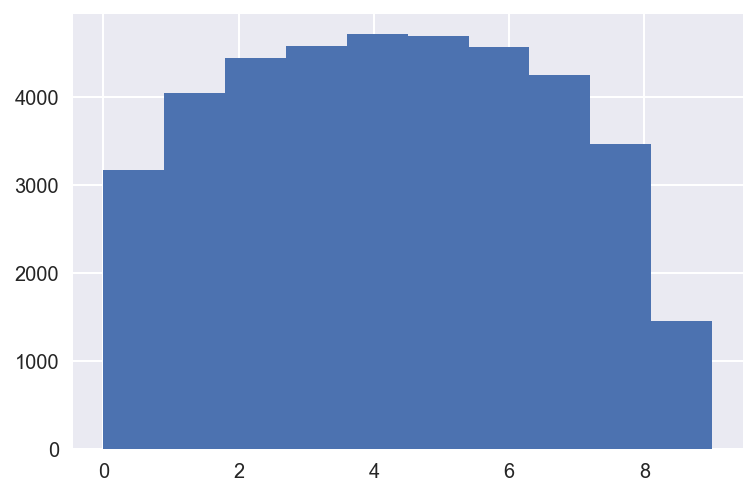

In [19]:
df.Feature_13.hist()

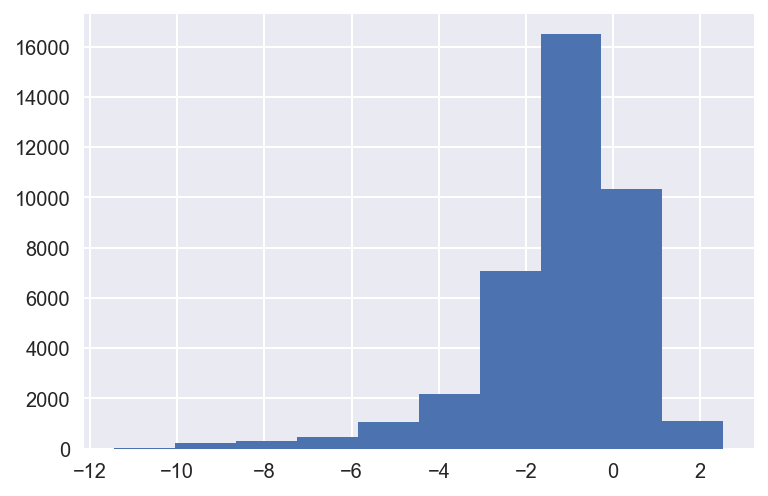

In [20]:
df.Feature_24.hist()

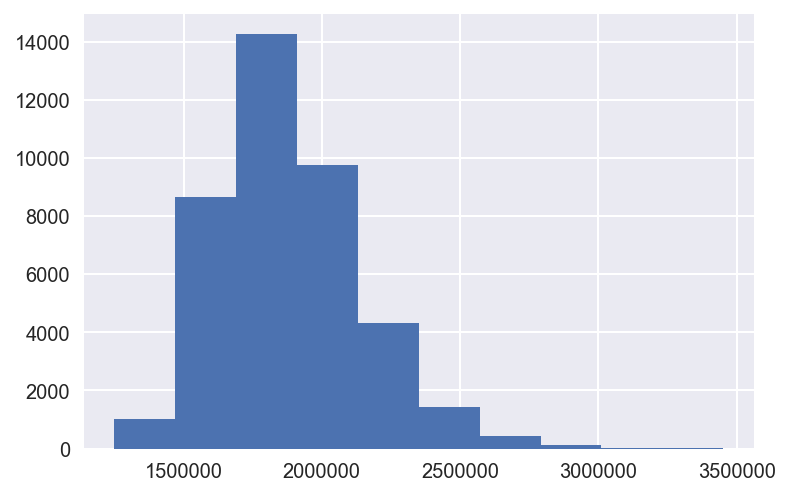

In [21]:
df.Weight_Daily.hist()

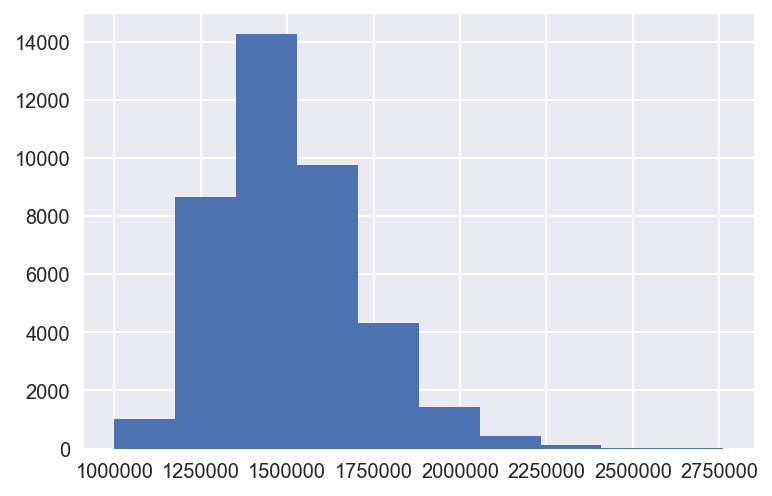

In [22]:
df.Weight_Intraday.hist()

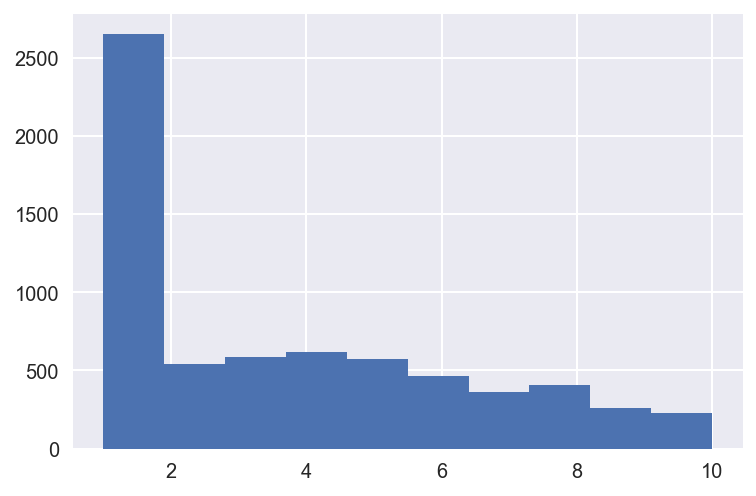

In [23]:
df.Feature_1.hist()

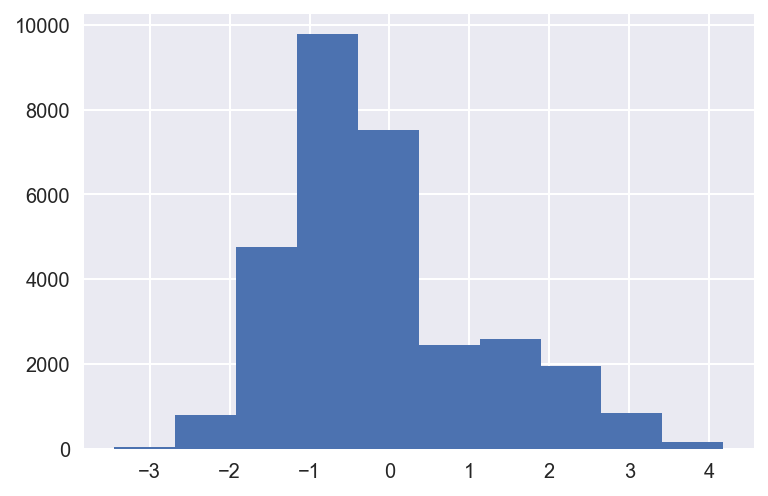

In [24]:
df.Feature_2.hist()

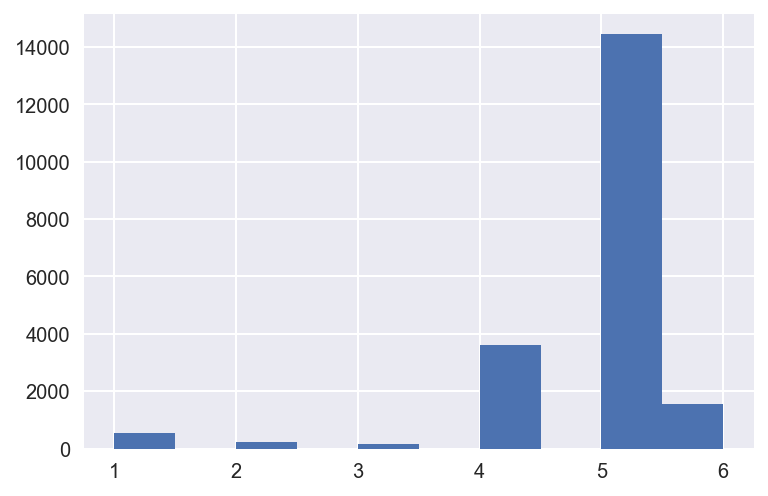

In [25]:
df.Feature_10.hist()

## Progress Report

* Examined the data for null values.  Since there is no information on the columns and the data they hold, it is hard to decide what to do with null values [Columns 1 and 10]
    * Column 10 seems to be one of the features correlated with weight daily and weight intra day
* The weight daily and weight intraday columns report the same information but on different scales
* Next Steps:
    * Try multiple inputation methods and see how they perform with different models
    * Try building models with null values as zeros
    * Try dropping columns with more than 50% missing values
    * PCA
* Models:
    * KNN Regression
    * Linear Regression
    * KNN Classifier
    * SVM
    * Time Series Model

Use D-1, D-2, and average 1-120 to predict D+1 as starting point.
 * Decision Trees and any regression

## Feature Engineering

* Row Standard deviation for returns 2 - 120
* T-1 - T-2 return difference
* Try summing r1 through r120
* Try compound interest 100 * (1 + r1/100) * (1 + r2/100) * ... * (1 + r120/100)

In [111]:
df.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Feature_13,Feature_14,Feature_15,Feature_16,Feature_17,Feature_18,Feature_19,Feature_20,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Ret_MinusTwo,Ret_MinusOne,Ret_2,Ret_3,Ret_4,Ret_5,Ret_6,Ret_7,Ret_8,Ret_9,Ret_10,Ret_11,Ret_12,Ret_13,Ret_14,Ret_15,Ret_16,Ret_17,Ret_18,Ret_19,Ret_20,Ret_21,Ret_22,Ret_23,Ret_24,Ret_25,Ret_26,Ret_27,Ret_28,Ret_29,Ret_30,Ret_31,Ret_32,Ret_33,Ret_34,Ret_35,Ret_36,Ret_37,Ret_38,Ret_39,Ret_40,Ret_41,Ret_42,Ret_43,Ret_44,Ret_45,Ret_46,Ret_47,Ret_48,Ret_49,Ret_50,Ret_51,Ret_52,Ret_53,Ret_54,Ret_55,Ret_56,Ret_57,Ret_58,Ret_59,Ret_60,Ret_61,Ret_62,Ret_63,Ret_64,Ret_65,Ret_66,Ret_67,Ret_68,Ret_69,Ret_70,Ret_71,Ret_72,Ret_73,Ret_74,Ret_75,Ret_76,Ret_77,Ret_78,Ret_79,Ret_80,Ret_81,Ret_82,Ret_83,Ret_84,Ret_85,Ret_86,Ret_87,Ret_88,Ret_89,Ret_90,Ret_91,Ret_92,Ret_93,Ret_94,Ret_95,Ret_96,Ret_97,Ret_98,Ret_99,Ret_100,Ret_101,Ret_102,Ret_103,Ret_104,Ret_105,Ret_106,Ret_107,Ret_108,Ret_109,Ret_110,Ret_111,Ret_112,Ret_113,Ret_114,Ret_115,Ret_116,Ret_117,Ret_118,Ret_119,Ret_120,Ret_121,Ret_122,Ret_123,Ret_124,Ret_125,Ret_126,Ret_127,Ret_128,Ret_129,Ret_130,Ret_131,Ret_132,Ret_133,Ret_134,Ret_135,Ret_136,Ret_137,Ret_138,Ret_139,Ret_140,Ret_141,Ret_142,Ret_143,Ret_144,Ret_145,Ret_146,Ret_147,Ret_148,Ret_149,Ret_150,Ret_151,Ret_152,Ret_153,Ret_154,Ret_155,Ret_156,Ret_157,Ret_158,Ret_159,Ret_160,Ret_161,Ret_162,Ret_163,Ret_164,Ret_165,Ret_166,Ret_167,Ret_168,Ret_169,Ret_170,Ret_171,Ret_172,Ret_173,Ret_174,Ret_175,Ret_176,Ret_177,Ret_178,Ret_179,Ret_180,Ret_PlusOne,Ret_PlusTwo,Weight_Intraday,Weight_Daily
0,NaN,NaN,NaN,NaN,8.0,NaN,75751,0.2254,11.0,NaN,NaN,0.49,5.0,1.842984,27.053679,1.0,NaN,NaN,-0.925463,2.0,NaN,-0.489492,NaN,NaN,NaN,0.055275,-0.010770,0.000003,-0.000734,-0.000738,-0.000007,0.000423,0.000438,-0.000076,0.000645,-0.000006,0.000006,NaN,-0.000156,NaN,NaN,-0.000430,-1.964625e-05,0.000002,-0.000031,NaN,NaN,-7.539950e-06,NaN,0.000416,-0.000164,-0.000009,-0.000438,NaN,0.000010,-7.176461e-04,-0.000162,NaN,NaN,NaN,-0.000582,0.001003,-0.000010,0.000134,0.000014,-0.000142,-0.001003,-0.000007,-0.000005,-1.277039e-05,NaN,0.000706,-0.000734,-7.311366e-04,-0.001996,-0.000153,0.000133,NaN,NaN,-0.000007,0.000713,0.000009,NaN,-0.000432,-0.001152,-0.000723,9.982299e-07,-0.003579,0.000435,-0.000012,-0.000132,0.000004,0.000418,-0.000011,NaN,-0.002724,-0.002996,0.000129,0.000012,-0.000002,-1.369941e-04,-0.003537,-0.000142,0.000135,0.000020,-1.318606e-04,0.000449,-0.000008,0.000006,0.000282,-1.390130e-04,-1.284489e-04,0.000005,-0.000005,-1.693501e-03,-0.002141,0.000003,-0.000274,-0.000015,0.001279,0.000282,-0.000003,-0.000156,0.000024,-0.000560,-0.000580,0.000138,-0.002277,0.000125,0.000406,-0.000427,-0.000013,-0.000843,1.666111e-04,0.000569,0.000695,NaN,0.000700,-0.000843,0.000268,-0.000415,-0.001133,0.000004,-0.000137,-0.000009,1.340780e-04,-0.000137,-0.000565,-0.000704,-0.005605,0.000826,0.001966,0.002676,0.000422,-0.000428,-0.000539,-0.002113,-0.001400,-0.000017,-0.002801,-0.000003,0.002099,0.000698,0.000547,-0.001976,0.000012,0.001112,0.000284,0.000003,-0.001976,-0.000842,-0.001390,0.000148,2.846942e-04,0.001254,-0.000130,0.000126,0.000978,0.000151,0.002642,-0.000017,0.000140,0.000015,-0.000011,0.001683,-0.000286,0.000010,0.000152,0.000579,-1.501973e-04,0.000822,0.001392,0.000292,0.000002,0.001133,-0.000134,0.001539,-0.000142,0.000861,0.000544,-0.002688,0.002246,-0.000838,-6.953224e-04,0.000003,-0.001974,-0.019512,0.028846,1.251508e+06,1.564385e+06
1,NaN,NaN,NaN,NaN,3.0,0.388896,17369,0.0166,13.0,NaN,-0.409923,0.71,9.0,1.577586,9.546915,1.0,-0.949891,0.917958,-0.897067,9.0,0.886205,-0.151805,1.239856,0.953424,-0.709462,0.009748,0.002987,-0.000487,0.000475,0.000002,-0.000002,-0.000523,-0.000255,-0.000008,0.000048,-0.000312,-0.000742,-0.000009,-0.000248,0.000487,0.000256,-0.000508,2.495416e-04,0.000015,0.000008,-0.000251,-0.000519,-5.029784e-04,0.000240,0.000248,0.000495,-0.000243,-0.000252,

In [113]:
# saving training data as pickle file so I can read it in in other notebooks
df.to_pickle('testing.pkl')

In [114]:
# reading in pickle file
new_df = pd.read_pickle('testing.pkl')

In [115]:
new_df.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Feature_13,Feature_14,Feature_15,Feature_16,Feature_17,Feature_18,Feature_19,Feature_20,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Ret_MinusTwo,Ret_MinusOne,Ret_2,Ret_3,Ret_4,Ret_5,Ret_6,Ret_7,Ret_8,Ret_9,Ret_10,Ret_11,Ret_12,Ret_13,Ret_14,Ret_15,Ret_16,Ret_17,Ret_18,Ret_19,Ret_20,Ret_21,Ret_22,Ret_23,Ret_24,Ret_25,Ret_26,Ret_27,Ret_28,Ret_29,Ret_30,Ret_31,Ret_32,Ret_33,Ret_34,Ret_35,Ret_36,Ret_37,Ret_38,Ret_39,Ret_40,Ret_41,Ret_42,Ret_43,Ret_44,Ret_45,Ret_46,Ret_47,Ret_48,Ret_49,Ret_50,Ret_51,Ret_52,Ret_53,Ret_54,Ret_55,Ret_56,Ret_57,Ret_58,Ret_59,Ret_60,Ret_61,Ret_62,Ret_63,Ret_64,Ret_65,Ret_66,Ret_67,Ret_68,Ret_69,Ret_70,Ret_71,Ret_72,Ret_73,Ret_74,Ret_75,Ret_76,Ret_77,Ret_78,Ret_79,Ret_80,Ret_81,Ret_82,Ret_83,Ret_84,Ret_85,Ret_86,Ret_87,Ret_88,Ret_89,Ret_90,Ret_91,Ret_92,Ret_93,Ret_94,Ret_95,Ret_96,Ret_97,Ret_98,Ret_99,Ret_100,Ret_101,Ret_102,Ret_103,Ret_104,Ret_105,Ret_106,Ret_107,Ret_108,Ret_109,Ret_110,Ret_111,Ret_112,Ret_113,Ret_114,Ret_115,Ret_116,Ret_117,Ret_118,Ret_119,Ret_120,Ret_121,Ret_122,Ret_123,Ret_124,Ret_125,Ret_126,Ret_127,Ret_128,Ret_129,Ret_130,Ret_131,Ret_132,Ret_133,Ret_134,Ret_135,Ret_136,Ret_137,Ret_138,Ret_139,Ret_140,Ret_141,Ret_142,Ret_143,Ret_144,Ret_145,Ret_146,Ret_147,Ret_148,Ret_149,Ret_150,Ret_151,Ret_152,Ret_153,Ret_154,Ret_155,Ret_156,Ret_157,Ret_158,Ret_159,Ret_160,Ret_161,Ret_162,Ret_163,Ret_164,Ret_165,Ret_166,Ret_167,Ret_168,Ret_169,Ret_170,Ret_171,Ret_172,Ret_173,Ret_174,Ret_175,Ret_176,Ret_177,Ret_178,Ret_179,Ret_180,Ret_PlusOne,Ret_PlusTwo,Weight_Intraday,Weight_Daily
0,NaN,NaN,NaN,NaN,8.0,NaN,75751,0.2254,11.0,NaN,NaN,0.49,5.0,1.842984,27.053679,1.0,NaN,NaN,-0.925463,2.0,NaN,-0.489492,NaN,NaN,NaN,0.055275,-0.010770,0.000003,-0.000734,-0.000738,-0.000007,0.000423,0.000438,-0.000076,0.000645,-0.000006,0.000006,NaN,-0.000156,NaN,NaN,-0.000430,-1.964625e-05,0.000002,-0.000031,NaN,NaN,-7.539950e-06,NaN,0.000416,-0.000164,-0.000009,-0.000438,NaN,0.000010,-7.176461e-04,-0.000162,NaN,NaN,NaN,-0.000582,0.001003,-0.000010,0.000134,0.000014,-0.000142,-0.001003,-0.000007,-0.000005,-1.277039e-05,NaN,0.000706,-0.000734,-7.311366e-04,-0.001996,-0.000153,0.000133,NaN,NaN,-0.000007,0.000713,0.000009,NaN,-0.000432,-0.001152,-0.000723,9.982299e-07,-0.003579,0.000435,-0.000012,-0.000132,0.000004,0.000418,-0.000011,NaN,-0.002724,-0.002996,0.000129,0.000012,-0.000002,-1.369941e-04,-0.003537,-0.000142,0.000135,0.000020,-1.318606e-04,0.000449,-0.000008,0.000006,0.000282,-1.390130e-04,-1.284489e-04,0.000005,-0.000005,-1.693501e-03,-0.002141,0.000003,-0.000274,-0.000015,0.001279,0.000282,-0.000003,-0.000156,0.000024,-0.000560,-0.000580,0.000138,-0.002277,0.000125,0.000406,-0.000427,-0.000013,-0.000843,1.666111e-04,0.000569,0.000695,NaN,0.000700,-0.000843,0.000268,-0.000415,-0.001133,0.000004,-0.000137,-0.000009,1.340780e-04,-0.000137,-0.000565,-0.000704,-0.005605,0.000826,0.001966,0.002676,0.000422,-0.000428,-0.000539,-0.002113,-0.001400,-0.000017,-0.002801,-0.000003,0.002099,0.000698,0.000547,-0.001976,0.000012,0.001112,0.000284,0.000003,-0.001976,-0.000842,-0.001390,0.000148,2.846942e-04,0.001254,-0.000130,0.000126,0.000978,0.000151,0.002642,-0.000017,0.000140,0.000015,-0.000011,0.001683,-0.000286,0.000010,0.000152,0.000579,-1.501973e-04,0.000822,0.001392,0.000292,0.000002,0.001133,-0.000134,0.001539,-0.000142,0.000861,0.000544,-0.002688,0.002246,-0.000838,-6.953224e-04,0.000003,-0.001974,-0.019512,0.028846,1.251508e+06,1.564385e+06
1,NaN,NaN,NaN,NaN,3.0,0.388896,17369,0.0166,13.0,NaN,-0.409923,0.71,9.0,1.577586,9.546915,1.0,-0.949891,0.917958,-0.897067,9.0,0.886205,-0.151805,1.239856,0.953424,-0.709462,0.009748,0.002987,-0.000487,0.000475,0.000002,-0.000002,-0.000523,-0.000255,-0.000008,0.000048,-0.000312,-0.000742,-0.000009,-0.000248,0.000487,0.000256,-0.000508,2.495416e-04,0.000015,0.000008,-0.000251,-0.000519,-5.029784e-04,0.000240,0.000248,0.000495,-0.000243,-0.000252,

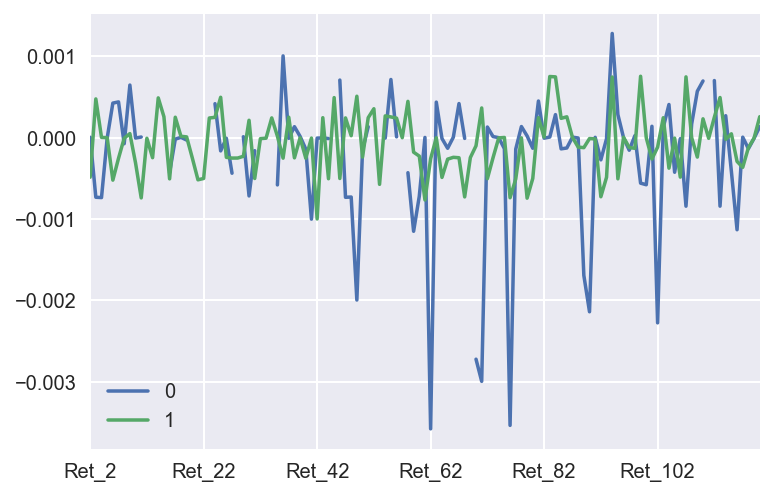

In [29]:
# plotting some rows to view the time series

x = df.iloc[0:2, 27:146]
xt = x.T

y = df.columns[27:146]
xt.index = y

xt.plot()

In [61]:
# Subsetting returns 2 - returns 120, returns for day T
X_t = df.iloc[:, 27:146]

X_t.head()
X_t.shape

(40000, 119)

In [62]:
# Using a backfill to fill missning values so I wouldn't have to drop any of the returns columns
X_t.fillna(method='backfill', axis=1, inplace=True)

In [63]:
X_t.head()

,Ret_2,Ret_3,Ret_4,Ret_5,Ret_6,Ret_7,Ret_8,Ret_9,Ret_10,Ret_11,Ret_12,Ret_13,Ret_14,Ret_15,Ret_16,Ret_17,Ret_18,Ret_19,Ret_20,Ret_21,Ret_22,Ret_23,Ret_24,Ret_25,Ret_26,Ret_27,Ret_28,Ret_29,Ret_30,Ret_31,Ret_32,Ret_33,Ret_34,Ret_35,Ret_36,Ret_37,Ret_38,Ret_39,Ret_40,Ret_41,Ret_42,Ret_43,Ret_44,Ret_45,Ret_46,Ret_47,Ret_48,Ret_49,Ret_50,Ret_51,Ret_52,Ret_53,Ret_54,Ret_55,Ret_56,Ret_57,Ret_58,Ret_59,Ret_60,Ret_61,Ret_62,Ret_63,Ret_64,Ret_65,Ret_66,Ret_67,Ret_68,Ret_69,Ret_70,Ret_71,Ret_72,Ret_73,Ret_74,Ret_75,Ret_76,Ret_77,Ret_78,Ret_79,Ret_80,Ret_81,Ret_82,Ret_83,Ret_84,Ret_85,Ret_86,Ret_87,Ret_88,Ret_89,Ret_90,Ret_91,Ret_92,Ret_93,Ret_94,Ret_95,Ret_96,Ret_97,Ret_98,Ret_99,Ret_100,Ret_101,Ret_102,Ret_103,Ret_104,Ret_105,Ret_106,Ret_107,Ret_108,Ret_109,Ret_110,Ret_111,Ret_112,Ret_113,Ret_114,Ret_115,Ret_116,Ret_117,Ret_118,Ret_119,Ret_120
0,0.000003,-0.000734,-0.000738,-0.000007,0.000423,0.000438,-0.000076,0.000645,-0.000006,0.000006,-0.000156,-0.000156,-0.000430,-0.000430,-0.000430,-1.964625e-05,0.000002,-0.000031,-0.000008,-0.000008,-7.539950e-06,0.000416,0.000416,-0.000164,-0.000009,-0.000438,0.000010,0.000010,-7.176461e-04,-0.000162,-0.000582,-0.000582,-0.000582,-0.000582,0.001003,-0.000010,0.000134,0.000014,-0.000142,-0.001003,-0.000007,-0.000005,-1.277039e-05,0.000706,0.000706,-0.000734,-7.311366e-04,-0.001996,-0.000153,0.000133,-0.000007,-0.000007,-0.000007,0.000713,0.000009,-0.000432,-0.000432,-0.001152,-0.000723,9.982299e-07,-0.003579,0.000435,-0.000012,-0.000132,0.000004,0.000418,-0.000011,-0.002724,-0.002724,-0.002996,0.000129,0.000012,-0.000002,-1.369941e-04,-0.003537,-0.000142,0.000135,0.000020,-1.318606e-04,0.000449,-0.000008,0.000006,0.000282,-1.390130e-04,-1.284489e-04,0.000005,-0.000005,-1.693501e-03,-0.002141,0.000003,-0.000274,-0.000015,0.001279,0.000282,-0.000003,-0.000156,0.000024,-0.000560,-0.000580,0.000138,-0.002277,0.000125,0.000406,-0.000427,-0.000013,-0.000843,1.666111e-04,0.000569,0.000695,0.000700,0.000700,-0.000843,0.000268,-0.000415,-0.001133,0.000004,-0.000137,-0.000009,1.340780e-04
1,-0.000487,0.000475,0.000002,-0.000002,-0.000523,-0.000255,-0.000008,0.000048,-0.000312,-0.000742,-0.000009,-0.000248,0.000487,0.000256,-0.000508,2.495416e-04,0.000015,0.000008,-0.000251,-0.000519,-5.029784e-04,0.000240,0.000248,0.000495,-0.000243,-0.000252,-0.000252,-0.000230,2.122038e-04,-0.000503,-0.000014,-0.000008,0.000241,0.000017,-0.000254,0.000250,-0.000250,-0.000003,-0.000254,-0.000006,-0.001000,0.000244,-5.060288e-04,0.000490,-0.000503,0.000241,2.252539e-05,0.000508,-0.000241,0.000244,0.000354,-0.000575,0.000266,0.000253,0.000238,-0.000002,0.000445,-0.000180,-0.000228,-7.674920e-04,-0.000260,-0.000002,-0.000490,-0.000266,-0.000243,-0.000248,-0.000730,-0.000246,-0.000102,0.000363,-0.000506,-0.000247,-0.000004,8.426020e-07,-0.000740,-0.000509,-0.000004,-0.000745,-5.031330e-04,0.000244,0.000006,0.000750,0.000745,2.358982e-04,2.546037e-04,0.000001,-0.000118,-1.242337e-04,-0.000012,-0.000017,-0.000728,-0.000489,0.000743,-0.000507,0.000003,-0.000123,-0.000133,0.000753,-0.000003,-0.000264,-0.000118,0.000244,-0.000377,-0.000007,-0.000486,0.000745,-7.091554e-07,-0.000240,0.000230,-0.000010,0.000249,0.000492,-0.000022,0.000046,-0.000294,-0.000366,-0.000125,-0.000007,2.558108e-04
2,-0.000782,-0.000402,0.000807,0.000400,0.000656,-0.001177,0.001198,0.000610,-0.001031,0.000647,-0.000930,-0.000543,0.000663,0.000787,0.000390,1.348995e-04,0.000122,-0.000133,0.000003,0.000141,5.381418e-04,0.000532,0.000106,0.000106,-0.000261,0.000125,-0.000268,-0.000404,-7.805902e-04,0.000270,-0.000399,-0.000388,0.000025,-0.000500,-0.000909,0.000532,-0.000908,-0.000007,-0.000780,-0.000140,-0.000530,0.000142,5.184317e-04,-0.000252,0.000130,0.000384,6.475105e-04,0.000115,0.000767,-0.000911,-0.000528,0.000530,-0.000278,-0.000776,-0.000128,-0.000003,0.000139,-0.000284,-0.000144,-3.869633e-04,-0.000651,-0.000139,0.000780,0.000516,-0.001057,-0.000640,0.000660,-0.000131,0.000011,-0.000274,-0.000796,0.000510,-0.000382,1.327088e-04,-0.000386,-0.000011,-

In [64]:
# Defining target, T + 1
y_t = df.Ret_PlusOne

In [65]:
# Searching for null values in target
y_t.isnull().sum()

0

In [67]:
# Searching for null values in features
X_t.isnull().sum()

Ret_2      0
Ret_3      0
Ret_4      0
Ret_5      0
Ret_6      0
Ret_7      0
Ret_8      0
Ret_9      0
Ret_10     0
Ret_11     0
Ret_12     0
Ret_13     0
Ret_14     0
Ret_15     0
Ret_16     0
Ret_17     0
Ret_18     0
Ret_19     0
Ret_20     0
Ret_21     0
Ret_22     0
Ret_23     0
Ret_24     0
Ret_25     0
Ret_26     0
Ret_27     0
Ret_28     0
Ret_29     0
Ret_30     0
Ret_31     0
Ret_32     0
Ret_33     0
Ret_34     0
Ret_35     0
Ret_36     0
Ret_37     0
Ret_38     0
Ret_39     0
Ret_40     0
Ret_41     0
Ret_42     0
Ret_43     0
Ret_44     0
Ret_45     0
Ret_46     0
Ret_47     0
Ret_48     0
Ret_49     0
Ret_50     0
Ret_51     0
Ret_52     0
Ret_53     0
Ret_54     0
Ret_55     0
Ret_56     0
Ret_57     0
Ret_58     0
Ret_59     0
Ret_60     0
Ret_61     0
Ret_62     0
Ret_63     0
Ret_64     0
Ret_65     0
Ret_66     0
Ret_67     0
Ret_68     0
Ret_69     0
Ret_70     0
Ret_71     0
Ret_72     0
Ret_73     0
Ret_74     0
Ret_75     0
Ret_76     0
Ret_77     0
Ret_78     0

In [70]:
# Calculating average of the returns withing day T
X_t['Ret_Avg'] = X_t.mean(axis=1)

In [71]:
X_t.head()

,Ret_2,Ret_3,Ret_4,Ret_5,Ret_6,Ret_7,Ret_8,Ret_9,Ret_10,Ret_11,Ret_12,Ret_13,Ret_14,Ret_15,Ret_16,Ret_17,Ret_18,Ret_19,Ret_20,Ret_21,Ret_22,Ret_23,Ret_24,Ret_25,Ret_26,Ret_27,Ret_28,Ret_29,Ret_30,Ret_31,Ret_32,Ret_33,Ret_34,Ret_35,Ret_36,Ret_37,Ret_38,Ret_39,Ret_40,Ret_41,Ret_42,Ret_43,Ret_44,Ret_45,Ret_46,Ret_47,Ret_48,Ret_49,Ret_50,Ret_51,Ret_52,Ret_53,Ret_54,Ret_55,Ret_56,Ret_57,Ret_58,Ret_59,Ret_60,Ret_61,Ret_62,Ret_63,Ret_64,Ret_65,Ret_66,Ret_67,Ret_68,Ret_69,Ret_70,Ret_71,Ret_72,Ret_73,Ret_74,Ret_75,Ret_76,Ret_77,Ret_78,Ret_79,Ret_80,Ret_81,Ret_82,Ret_83,Ret_84,Ret_85,Ret_86,Ret_87,Ret_88,Ret_89,Ret_90,Ret_91,Ret_92,Ret_93,Ret_94,Ret_95,Ret_96,Ret_97,Ret_98,Ret_99,Ret_100,Ret_101,Ret_102,Ret_103,Ret_104,Ret_105,Ret_106,Ret_107,Ret_108,Ret_109,Ret_110,Ret_111,Ret_112,Ret_113,Ret_114,Ret_115,Ret_116,Ret_117,Ret_118,Ret_119,Ret_120,Ret_Avg
0,0.000003,-0.000734,-0.000738,-0.000007,0.000423,0.000438,-0.000076,0.000645,-0.000006,0.000006,-0.000156,-0.000156,-0.000430,-0.000430,-0.000430,-1.964625e-05,0.000002,-0.000031,-0.000008,-0.000008,-7.539950e-06,0.000416,0.000416,-0.000164,-0.000009,-0.000438,0.000010,0.000010,-7.176461e-04,-0.000162,-0.000582,-0.000582,-0.000582,-0.000582,0.001003,-0.000010,0.000134,0.000014,-0.000142,-0.001003,-0.000007,-0.000005,-1.277039e-05,0.000706,0.000706,-0.000734,-7.311366e-04,-0.001996,-0.000153,0.000133,-0.000007,-0.000007,-0.000007,0.000713,0.000009,-0.000432,-0.000432,-0.001152,-0.000723,9.982299e-07,-0.003579,0.000435,-0.000012,-0.000132,0.000004,0.000418,-0.000011,-0.002724,-0.002724,-0.002996,0.000129,0.000012,-0.000002,-1.369941e-04,-0.003537,-0.000142,0.000135,0.000020,-1.318606e-04,0.000449,-0.000008,0.000006,0.000282,-1.390130e-04,-1.284489e-04,0.000005,-0.000005,-1.693501e-03,-0.002141,0.000003,-0.000274,-0.000015,0.001279,0.000282,-0.000003,-0.000156,0.000024,-0.000560,-0.000580,0.000138,-0.002277,0.000125,0.000406,-0.000427,-0.000013,-0.000843,1.666111e-04,0.000569,0.000695,0.000700,0.000700,-0.000843,0.000268,-0.000415,-0.001133,0.000004,-0.000137,-0.000009,1.340780e-04,-0.000247
1,-0.000487,0.000475,0.000002,-0.000002,-0.000523,-0.000255,-0.000008,0.000048,-0.000312,-0.000742,-0.000009,-0.000248,0.000487,0.000256,-0.000508,2.495416e-04,0.000015,0.000008,-0.000251,-0.000519,-5.029784e-04,0.000240,0.000248,0.000495,-0.000243,-0.000252,-0.000252,-0.000230,2.122038e-04,-0.000503,-0.000014,-0.000008,0.000241,0.000017,-0.000254,0.000250,-0.000250,-0.000003,-0.000254,-0.000006,-0.001000,0.000244,-5.060288e-04,0.000490,-0.000503,0.000241,2.252539e-05,0.000508,-0.000241,0.000244,0.000354,-0.000575,0.000266,0.000253,0.000238,-0.000002,0.000445,-0.000180,-0.000228,-7.674920e-04,-0.000260,-0.000002,-0.000490,-0.000266,-0.000243,-0.000248,-0.000730,-0.000246,-0.000102,0.000363,-0.000506,-0.000247,-0.000004,8.426020e-07,-0.000740,-0.000509,-0.000004,-0.000745,-5.031330e-04,0.000244,0.000006,0.000750,0.000745,2.358982e-04,2.546037e-04,0.000001,-0.000118,-1.242337e-04,-0.000012,-0.000017,-0.000728,-0.000489,0.000743,-0.000507,0.000003,-0.000123,-0.000133,0.000753,-0.000003,-0.000264,-0.000118,0.000244,-0.000377,-0.000007,-0.000486,0.000745,-7.091554e-07,-0.000240,0.000230,-0.000010,0.000249,0.000492,-0.000022,0.000046,-0.000294,-0.000366,-0.000125,-0.000007,2.558108e-04,-0.000068
2,-0.000782,-0.000402,0.000807,0.000400,0.000656,-0.001177,0.001198,0.000610,-0.001031,0.000647,-0.000930,-0.000543,0.000663,0.000787,0.000390,1.348995e-04,0.000122,-0.000133,0.000003,0.000141,5.381418e-04,0.000532,0.000106,0.000106,-0.000261,0.000125,-0.000268,-0.000404,-7.805902e-04,0.000270,-0.000399,-0.000388,0.000025,-0.000500,-0.000909,0.000532,-0.000908,-0.000007,-0.000780,-0.000140,-0.000530,0.000142,5.184317e-04,-0.000252,0.000130,0.000384,6.475105e-04,0.000115,0.000767,-0.000911,-0.000528,0.000530,-0.000278,-0.000776,-0.000128,-0.000003,0.000139,-0.000284,-0.000144,-3.869633e-04,-0.000651,-0.000139,0.000780,0.000516,-0.001057,-0.000640,0.000660,-0.000131,0.000011,-0.000274,-0.000796,0.000510,-0.000382,1.3270

In [72]:
# including returns for T - 1 and T - 2 into T dataframe
X_t['Ret_MinusOne'] = df.Ret_MinusOne
X_t['Ret_MinusTwo'] = df.Ret_MinusTwo

In [75]:
X_t.head()

,Ret_2,Ret_3,Ret_4,Ret_5,Ret_6,Ret_7,Ret_8,Ret_9,Ret_10,Ret_11,Ret_12,Ret_13,Ret_14,Ret_15,Ret_16,Ret_17,Ret_18,Ret_19,Ret_20,Ret_21,Ret_22,Ret_23,Ret_24,Ret_25,Ret_26,Ret_27,Ret_28,Ret_29,Ret_30,Ret_31,Ret_32,Ret_33,Ret_34,Ret_35,Ret_36,Ret_37,Ret_38,Ret_39,Ret_40,Ret_41,Ret_42,Ret_43,Ret_44,Ret_45,Ret_46,Ret_47,Ret_48,Ret_49,Ret_50,Ret_51,Ret_52,Ret_53,Ret_54,Ret_55,Ret_56,Ret_57,Ret_58,Ret_59,Ret_60,Ret_61,Ret_62,Ret_63,Ret_64,Ret_65,Ret_66,Ret_67,Ret_68,Ret_69,Ret_70,Ret_71,Ret_72,Ret_73,Ret_74,Ret_75,Ret_76,Ret_77,Ret_78,Ret_79,Ret_80,Ret_81,Ret_82,Ret_83,Ret_84,Ret_85,Ret_86,Ret_87,Ret_88,Ret_89,Ret_90,Ret_91,Ret_92,Ret_93,Ret_94,Ret_95,Ret_96,Ret_97,Ret_98,Ret_99,Ret_100,Ret_101,Ret_102,Ret_103,Ret_104,Ret_105,Ret_106,Ret_107,Ret_108,Ret_109,Ret_110,Ret_111,Ret_112,Ret_113,Ret_114,Ret_115,Ret_116,Ret_117,Ret_118,Ret_119,Ret_120,Ret_Avg,Ret_MinusOne,Ret_MinusTwo
0,0.000003,-0.000734,-0.000738,-0.000007,0.000423,0.000438,-0.000076,0.000645,-0.000006,0.000006,-0.000156,-0.000156,-0.000430,-0.000430,-0.000430,-1.964625e-05,0.000002,-0.000031,-0.000008,-0.000008,-7.539950e-06,0.000416,0.000416,-0.000164,-0.000009,-0.000438,0.000010,0.000010,-7.176461e-04,-0.000162,-0.000582,-0.000582,-0.000582,-0.000582,0.001003,-0.000010,0.000134,0.000014,-0.000142,-0.001003,-0.000007,-0.000005,-1.277039e-05,0.000706,0.000706,-0.000734,-7.311366e-04,-0.001996,-0.000153,0.000133,-0.000007,-0.000007,-0.000007,0.000713,0.000009,-0.000432,-0.000432,-0.001152,-0.000723,9.982299e-07,-0.003579,0.000435,-0.000012,-0.000132,0.000004,0.000418,-0.000011,-0.002724,-0.002724,-0.002996,0.000129,0.000012,-0.000002,-1.369941e-04,-0.003537,-0.000142,0.000135,0.000020,-1.318606e-04,0.000449,-0.000008,0.000006,0.000282,-1.390130e-04,-1.284489e-04,0.000005,-0.000005,-1.693501e-03,-0.002141,0.000003,-0.000274,-0.000015,0.001279,0.000282,-0.000003,-0.000156,0.000024,-0.000560,-0.000580,0.000138,-0.002277,0.000125,0.000406,-0.000427,-0.000013,-0.000843,1.666111e-04,0.000569,0.000695,0.000700,0.000700,-0.000843,0.000268,-0.000415,-0.001133,0.000004,-0.000137,-0.000009,1.340780e-04,-0.000247,-0.010770,0.055275
1,-0.000487,0.000475,0.000002,-0.000002,-0.000523,-0.000255,-0.000008,0.000048,-0.000312,-0.000742,-0.000009,-0.000248,0.000487,0.000256,-0.000508,2.495416e-04,0.000015,0.000008,-0.000251,-0.000519,-5.029784e-04,0.000240,0.000248,0.000495,-0.000243,-0.000252,-0.000252,-0.000230,2.122038e-04,-0.000503,-0.000014,-0.000008,0.000241,0.000017,-0.000254,0.000250,-0.000250,-0.000003,-0.000254,-0.000006,-0.001000,0.000244,-5.060288e-04,0.000490,-0.000503,0.000241,2.252539e-05,0.000508,-0.000241,0.000244,0.000354,-0.000575,0.000266,0.000253,0.000238,-0.000002,0.000445,-0.000180,-0.000228,-7.674920e-04,-0.000260,-0.000002,-0.000490,-0.000266,-0.000243,-0.000248,-0.000730,-0.000246,-0.000102,0.000363,-0.000506,-0.000247,-0.000004,8.426020e-07,-0.000740,-0.000509,-0.000004,-0.000745,-5.031330e-04,0.000244,0.000006,0.000750,0.000745,2.358982e-04,2.546037e-04,0.000001,-0.000118,-1.242337e-04,-0.000012,-0.000017,-0.000728,-0.000489,0.000743,-0.000507,0.000003,-0.000123,-0.000133,0.000753,-0.000003,-0.000264,-0.000118,0.000244,-0.000377,-0.000007,-0.000486,0.000745,-7.091554e-07,-0.000240,0.000230,-0.000010,0.000249,0.000492,-0.000022,0.000046,-0.000294,-0.000366,-0.000125,-0.000007,2.558108e-04,-0.000068,0.002987,0.009748
2,-0.000782,-0.000402,0.000807,0.000400,0.000656,-0.001177,0.001198,0.000610,-0.001031,0.000647,-0.000930,-0.000543,0.000663,0.000787,0.000390,1.348995e-04,0.000122,-0.000133,0.000003,0.000141,5.381418e-04,0.000532,0.000106,0.000106,-0.000261,0.000125,-0.000268,-0.000404,-7.805902e-04,0.000270,-0.000399,-0.000388,0.000025,-0.000500,-0.000909,0.000532,-0.000908,-0.000007,-0.000780,-0.000140,-0.000530,0.000142,5.184317e-04,-0.000252,0.000130,0.000384,6.475105e-04,0.000115,0.000767,-0.000911,-0.000528,0.000530,-0.000278,-0.000776,-0.000128,-0.000003,0.000139,-0.000284,-0.000144,-3.869633e-04,-0.000651,-0.000139,0.000780,0.000516,-0.001057,-0.000640,0.000660,-

In [76]:
X_t.shape

(40000, 122)

In [79]:
# Using only the average, T minus 1 and T minus 2 as features
X = X_t.iloc[:, 119:122]

In [85]:
# Train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_t, test_size = 0.3, random_state=42)


In [86]:
# creating number of cross validation folds
from sklearn.model_selection import KFold
cv = KFold(n_splits=10, shuffle=True, random_state=20)

In [87]:
# Scaling data, training and scoring on a linear regression model
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler


ss = StandardScaler()
ss.fit(X_train)
Xs = ss.transform(X_train)

linreg = LinearRegression()
linreg.fit(Xs, y_train)

# Not too hot a score
cross_val_score(linreg, Xs, y_train, cv=cv).mean()

0.00024251474768148808

In [88]:
# Doing a ridge grid search
from sklearn.model_selection import GridSearchCV
ridge_params = {
    'alpha' : np.logspace(-5, 5, 20)
}

In [89]:
ridge_gridsearch = GridSearchCV(Ridge(), ridge_params, verbose=1, cv=10)

ridge_gridsearch.fit(Xs, y_train)
best_ridge = ridge_gridsearch.best_estimator_

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    2.0s finished


In [90]:
# Score is not to hot either
ridge_gridsearch.best_score_

0.0018936748349948182

In [91]:
# Doing a grid search over an elastic error reduction model
elastic_params = {
    'alpha' : np.logspace(-5, 5, 20),
    'l1_ratio' : [0.1, 0.2, 0.5, 0.6, 0.8, 0.9]
}

elastic_gridsearch = GridSearchCV(ElasticNet(), elastic_params, verbose=1, cv=10)

In [92]:
elastic_gridsearch.fit(Xs, y_train)
best_elastic = elastic_gridsearch.best_estimator_

Fitting 10 folds for each of 120 candidates, totalling 1200 fits


[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:    9.5s finished


In [93]:
# Score is not too hot either
elastic_gridsearch.best_score_

0.0026899528867292194

In [94]:
from sklearn.neighbors import KNeighborsRegressor

In [97]:
# Fitting on a KNN regressor with 109 neighbors, it's approximately the square root of number of samples I have
knn = KNeighborsRegressor(n_neighbors=109, weights='uniform')
knn.fit(Xs, y_train)

scores = cross_val_score(knn, Xs, y_train, cv=cv)

In [98]:
# Score is below 0
print scores.mean(), scores.std()

-0.290825795227 0.0444411297454


In [99]:
# Including returns on T, T-1, T-2, and Mean of returns on T
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_t, y_t, test_size = 0.3, random_state=42)


In [101]:
# Normalizing and training on a linear regression model
ss1 = StandardScaler()
ss1.fit(X_train_1)
Xs_1 = ss1.transform(X_train_1)

linreg_1 = LinearRegression()
linreg_1.fit(Xs_1, y_train_1)

# Score is a little better
cross_val_score(linreg, Xs_1, y_train_1, cv=cv).mean()

0.043698381377672735

In [103]:
# Training on a ridge error reduction grid search
ridge_gridsearch_1 = GridSearchCV(Ridge(), ridge_params, verbose=1, cv=10)

ridge_gridsearch_1.fit(Xs_1, y_train_1)
best_ridge_1 = ridge_gridsearch.best_estimator_

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   22.8s finished


In [105]:
# Little improvement on score
ridge_gridsearch_1.best_score_

0.053168828001620892

In [106]:
# Training on an elastic net error reduction grid search
elastic_gridsearch_1 = GridSearchCV(ElasticNet(), elastic_params, verbose=1, cv=10)

elastic_gridsearch_1.fit(Xs_1, y_train_1)
best_elastic_1 = elastic_gridsearch_1.best_estimator_

Fitting 10 folds for each of 120 candidates, totalling 1200 fits


/Users/arafatakinlabi/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:  3.9min finished


In [107]:
# Also little improvement on score
elastic_gridsearch_1.best_score_

0.054501675167100756